<a href="https://colab.research.google.com/github/so-yeon-hwang/DataSciencePractice/blob/main/23_11_13_Latent_Factor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data import

In [2]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip # download the file from url
!unzip ml-100k.zip # unzip

--2023-11-13 11:28:57--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  5.10MB/s    in 0.9s    

2023-11-13 11:28:59 (5.10 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.ba

In [3]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
train = pd.read_csv('ml-100k/ua.base', sep='\t',names = ['user','movie','rating','timestamp'])
test = pd.read_csv('ml-100k/ua.test', sep='\t',names = ['user','movie','rating','timestamp'])

In [6]:
# data transformation
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

# Latent Factor Model

In [7]:
rank = 10 # dimension of user's vector & item's vector
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad = True)
Q = torch.randn(numUsers, rank, requires_grad = True)

In [8]:
optimizer = torch.optim.Adam([P,Q], lr = 0.1)

for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  cost = F.mse_loss(hypothesis,ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))


epoch: 0, cost: 23.260519
epoch: 100, cost: 0.565611
epoch: 200, cost: 0.494091
epoch: 300, cost: 0.472489
epoch: 400, cost: 0.463047
epoch: 500, cost: 0.457625
epoch: 600, cost: 0.453825
epoch: 700, cost: 0.451051
epoch: 800, cost: 0.449088
epoch: 900, cost: 0.447711


In [10]:
optim = torch.optim.Adam([P,Q], lr = 0.1)
mse = torch.nn.MSELoss()

for epoch in range(1001):
  h = (P[items] * Q[users]).sum(dim=1)
  cost = mse(h,ratings)

  optim.zero_grad()
  cost.backward()
  optim.step()

  with torch.no_grad():
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

epoch: 0, cost: 0.446647
epoch: 1, cost: 0.516788
epoch: 2, cost: 0.554450
epoch: 3, cost: 0.499325
epoch: 4, cost: 0.503489
epoch: 5, cost: 0.502996
epoch: 6, cost: 0.480044
epoch: 7, cost: 0.471598
epoch: 8, cost: 0.480309
epoch: 9, cost: 0.478671
epoch: 10, cost: 0.467926
epoch: 11, cost: 0.463244
epoch: 12, cost: 0.465617
epoch: 13, cost: 0.465602
epoch: 14, cost: 0.461092
epoch: 15, cost: 0.458022
epoch: 16, cost: 0.457933
epoch: 17, cost: 0.458066
epoch: 18, cost: 0.456500
epoch: 19, cost: 0.454576
epoch: 20, cost: 0.453706
epoch: 21, cost: 0.453398
epoch: 22, cost: 0.452864
epoch: 23, cost: 0.451981
epoch: 24, cost: 0.451278
epoch: 25, cost: 0.450825
epoch: 26, cost: 0.450450
epoch: 27, cost: 0.450049
epoch: 28, cost: 0.449576
epoch: 29, cost: 0.449170
epoch: 30, cost: 0.448881
epoch: 31, cost: 0.448669
epoch: 32, cost: 0.448372
epoch: 33, cost: 0.448083
epoch: 34, cost: 0.447892
epoch: 35, cost: 0.447718
epoch: 36, cost: 0.447521
epoch: 37, cost: 0.447338
epoch: 38, cost: 0.447

In [11]:
optim = torch.optim.Adam([P,Q], lr = 0.1)
mse = torch.nn.MSELoss()

X = []
Y = []

for epoch in range(1001):
  h = (P[items] * Q[users]).sum(dim=1)
  cost = mse(h,ratings)

  optim.zero_grad()
  cost.backward()
  optim.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())
    # print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

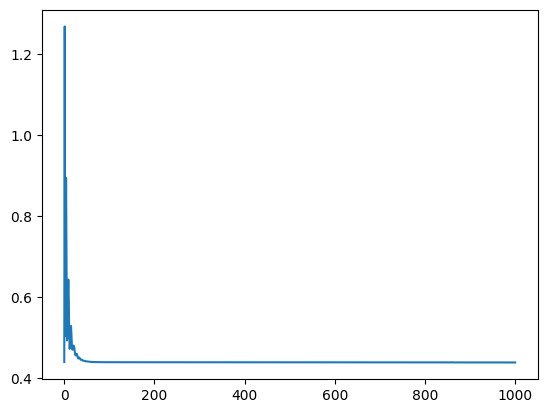

In [12]:
plt.plot(X,Y)
plt.show()

# Y_test Visualization

In [15]:
rank = 10 # dimension of user's vector & item's vector
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad = True)
Q = torch.randn(numUsers, rank, requires_grad = True)


optim = torch.optim.Adam([P,Q], lr = 0.1)
mse = torch.nn.MSELoss()

X = []
Y = []
Y_test = []

for epoch in range(1001):
  h = (P[items] * Q[users]).sum(dim=1)
  cost = mse(h,ratings)

  optim.zero_grad()
  cost.backward()
  optim.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())
    h_test = (P[items_test] * Q[users_test]).sum(dim=1)
    cost_test = mse(h_test,ratings_test)
    Y_test.append(cost_test.item())

    # print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

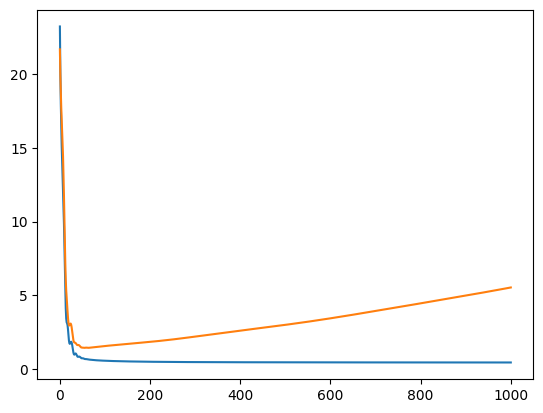

In [16]:
plt.plot(X,Y)
plt.plot(X,Y_test)
plt.show()

# Regularization

In [20]:
lambda1 = 0.1
lambda2 = 0.1

rank = 10 # dimension of user's vector & item's vector
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad = True)
Q = torch.randn(numUsers, rank, requires_grad = True)


optim = torch.optim.Adam([P,Q], lr = 0.1)
mse = torch.nn.MSELoss()

X = []
Y = []
Y_test = []

for epoch in range(1001):
  h = (P[items] * Q[users]).sum(dim=1)
  cost = mse(h,ratings)
  cost_reg = cost + lambda1 * (P **2).mean() + lambda2 * (Q ** 2).mean()

  optim.zero_grad()
  cost_reg.backward()
  optim.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())
    h_test = (P[items_test] * Q[users_test]).sum(dim=1)
    cost_test = mse(h_test,ratings_test)
    Y_test.append(cost_test.item())

    # print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

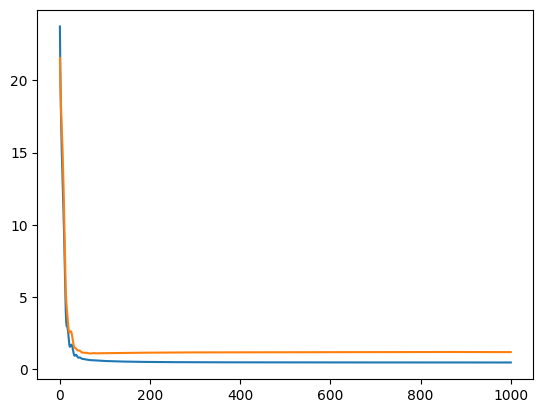

In [21]:
plt.plot(X,Y)
plt.plot(X,Y_test)
plt.show()

# Bias

In [26]:
lambda1 = 0.1
lambda2 = 0.1
lambda3 = 0.1
lambda4 = 0.1

rank = 10 # dimension of user's vector & item's vector
num_items = items.max() + 1
num_users = users.max() + 1
P = torch.randn(numItems, rank, requires_grad = True)
Q = torch.randn(numUsers, rank, requires_grad = True)
bias_item = torch.randn(num_items, requires_grad = True)
bias_user = torch.randn(num_users, requires_grad = True)
# mean = (ratings.sum() / len(ratings)).item()
mean = ratings.mean()


optim = torch.optim.Adam([P,Q], lr = 0.1)
mse = torch.nn.MSELoss()

X = []
Y = []
Y_test = []

for epoch in range(1001):
  h = (P[items] * Q[users]).sum(dim=1) + mean + bias_item[items] + bias_user[users]
  cost = mse(h,ratings)
  cost_reg = cost + lambda1 * (P **2).mean() + lambda2 * (Q ** 2).mean() + lambda3 * (bias_item **2).mean() + lambda4 * (bias_user ** 2).mean()

  optim.zero_grad()
  cost_reg.backward()
  optim.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())
    h_test = (P[items_test] * Q[users_test]).sum(dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = mse(h_test,ratings_test)
    Y_test.append(cost_test.item())

    # print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

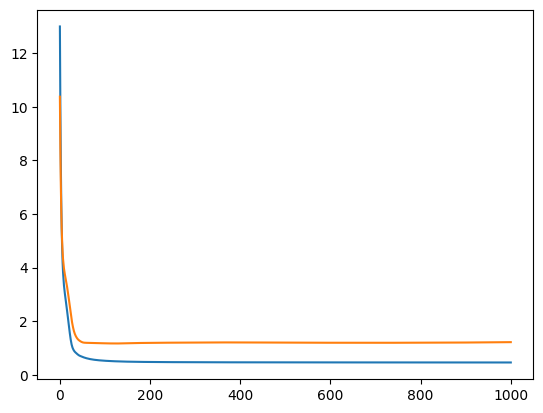

In [27]:
plt.plot(X,Y)
plt.plot(X,Y_test)
plt.show()